<a href="https://colab.research.google.com/github/priontu/Fashion_MNIST_Classification/blob/main/Fashion_MNIST_Classification.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [206]:
import tensorflow as tf
from tensorflow import keras
import matplotlib.pyplot as plt
import numpy as np

In [207]:
tf.__version__

'2.15.0'

Let's start by loading the fashion MNIST dataset. Keras has a number of functions to load popular datasets in `keras.datasets`. The dataset is already split for you between a training set and a test set, but it can be useful to split the training set further to have a validation set:

In [208]:
fashion_mnist = keras.datasets.fashion_mnist
(X_train_full, y_train_full), (X_test, y_test) = fashion_mnist.load_data()

The training set contains 60,000 grayscale images, each 28x28 pixels:

In [209]:
X_train_full.shape

(60000, 28, 28)

Each pixel intensity is represented as a byte (0 to 255):

In [210]:
X_train_full.dtype

dtype('uint8')

Let's split the full training set into a validation set and a (smaller) training set. We also scale the pixel intensities down to the 0-1 range and convert them to floats, by dividing by 255.

In [211]:
X_valid, X_train = X_train_full[:5000] / 255., X_train_full[5000:] / 255.
y_valid, y_train = y_train_full[:5000], y_train_full[5000:]
X_test = X_test / 255.

You can plot an image using Matplotlib's `imshow()` function, with a `'binary'`
 color map:

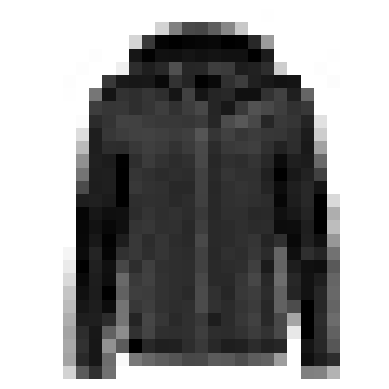

In [212]:
plt.imshow(X_train[0], cmap="binary")
plt.axis('off')
plt.show()

The labels are the class IDs (represented as uint8), from 0 to 9:

In [213]:
y_train

array([4, 0, 7, ..., 3, 0, 5], dtype=uint8)

Here are the corresponding class names:

In [214]:
class_names = ["T-shirt/top", "Trouser", "Pullover", "Dress", "Coat",
               "Sandal", "Shirt", "Sneaker", "Bag", "Ankle boot"]

So the first image in the training set is a coat:

In [215]:
class_names[y_train[0]]

'Coat'

The validation set contains 5,000 images, and the test set contains 10,000 images:

In [216]:
X_valid.shape

(5000, 28, 28)

In [217]:
X_test.shape

(10000, 28, 28)

Let's take a look at a sample of the images in the dataset:

In [218]:
# n_rows = 4
# n_cols = 10
# plt.figure(figsize=(n_cols * 1.2, n_rows * 1.2))
# for row in range(n_rows):
#     for col in range(n_cols):
#         index = n_cols * row + col
#         plt.subplot(n_rows, n_cols, index + 1)
#         plt.imshow(X_train[index], cmap="binary", interpolation="nearest")
#         plt.axis('off')
#         plt.title(class_names[y_train[index]], fontsize=12)
# plt.subplots_adjust(wspace=0.2, hspace=0.5)
# save_fig('fashion_mnist_plot', tight_layout=False)
# plt.show()

In [219]:
# model = keras.models.Sequential()
# model.add(keras.layers.Flatten(input_shape=[28, 28]))
# model.add(keras.layers.Dense(30, activation="relu"))
# model.add(keras.layers.Dense(10, activation="relu"))
# model.add(keras.layers.Dense(10, activation="softmax"))

In [220]:
keras.backend.clear_session()
np.random.seed(42)
tf.random.set_seed(42)

In [221]:
model = keras.models.Sequential([
    keras.layers.Flatten(input_shape=[28, 28]),
    keras.layers.Dense(12, activation="relu"),
    keras.layers.Dense(12, activation="relu"),
    keras.layers.Dense(12, activation="relu"),
    keras.layers.Dense(10, activation="relu"),
    keras.layers.Dense(10, activation="softmax")
])

In [222]:
model.layers

In [223]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 flatten (Flatten)           (None, 784)               0         
                                                                 
 dense (Dense)               (None, 12)                9420      
                                                                 
 dense_1 (Dense)             (None, 12)                156       
                                                                 
 dense_2 (Dense)             (None, 12)                156       
                                                                 
 dense_3 (Dense)             (None, 10)                130       
                                                                 
 dense_4 (Dense)             (None, 10)                110       
                                                                 
Total params: 9972 (38.95 KB)
Trainable params: 9972 (38

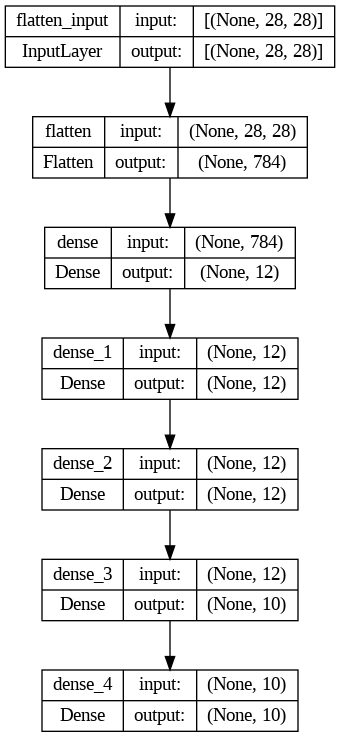

In [224]:
keras.utils.plot_model(model, "my_fashion_mnist_model.png", show_shapes=True)

In [225]:
hidden1 = model.layers[1]
hidden1.name

'dense'

In [226]:
model.get_layer(hidden1.name) is hidden1

True

In [227]:
weights, biases = hidden1.get_weights()

In [228]:
weights

array([[-0.04723557,  0.08193355, -0.02362681, ...,  0.03117409,
         0.05607658,  0.03455956],
       [-0.06162801, -0.02150621,  0.03754257, ..., -0.04426244,
        -0.01128494, -0.05944144],
       [-0.03012038,  0.06458003, -0.0189172 , ..., -0.02731225,
         0.04411539, -0.00645684],
       ...,
       [-0.05517855, -0.08171101, -0.03667596, ...,  0.08204263,
        -0.05668864,  0.00439228],
       [-0.00479333,  0.00982248,  0.00546619, ..., -0.01634811,
         0.05935455, -0.0208731 ],
       [ 0.01752769, -0.05824044,  0.01246186, ..., -0.02631372,
        -0.06966824, -0.0789268 ]], dtype=float32)

In [229]:
weights.shape

(784, 12)

In [230]:
biases

array([0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.], dtype=float32)

In [231]:
biases.shape

(12,)

In [232]:
checkpoint_dir = "/"
# cpkt = tf.train.Checkpoint(optimizer = "adam", model = model)
# manager = tf.train.CheckpointManager(cpkt, directory = checkpoint_dir, max_to_keep=5)
# manager.restore_or_initialize()

model.compile(loss="sparse_categorical_crossentropy",
              optimizer="adam",
              metrics=["accuracy"])


checkpoint_callback = tf.keras.callbacks.ModelCheckpoint(checkpoint_dir, save_best_only = True)
early_stopping_callback = tf.keras.callbacks.EarlyStopping(patience = 15, restore_best_weights=True)

callbacks = [early_stopping_callback, checkpoint_callback]

In [233]:
history = model.fit(X_train, y_train, epochs=100,
                    verbose = 2,
                    validation_data=(X_valid, y_valid),
                    callbacks = callbacks)

Epoch 1/100
1719/1719 - 6s - loss: 0.8114 - accuracy: 0.6983 - val_loss: 0.5163 - val_accuracy: 0.8222 - 6s/epoch - 3ms/step
Epoch 2/100
1719/1719 - 6s - loss: 0.5130 - accuracy: 0.8182 - val_loss: 0.4844 - val_accuracy: 0.8296 - 6s/epoch - 3ms/step
Epoch 3/100
1719/1719 - 4s - loss: 0.4689 - accuracy: 0.8319 - val_loss: 0.4282 - val_accuracy: 0.8456 - 4s/epoch - 2ms/step
Epoch 4/100
1719/1719 - 4s - loss: 0.4386 - accuracy: 0.8440 - val_loss: 0.4183 - val_accuracy: 0.8478 - 4s/epoch - 2ms/step
Epoch 5/100
1719/1719 - 5s - loss: 0.4196 - accuracy: 0.8499 - val_loss: 0.4018 - val_accuracy: 0.8522 - 5s/epoch - 3ms/step
Epoch 6/100
1719/1719 - 3s - loss: 0.4060 - accuracy: 0.8545 - val_loss: 0.4140 - val_accuracy: 0.8508 - 3s/epoch - 2ms/step
Epoch 7/100
1719/1719 - 5s - loss: 0.3926 - accuracy: 0.8617 - val_loss: 0.3928 - val_accuracy: 0.8596 - 5s/epoch - 3ms/step
Epoch 8/100
1719/1719 - 7s - loss: 0.3834 - accuracy: 0.8613 - val_loss: 0.3908 - val_accuracy: 0.8644 - 7s/epoch - 4ms/step


In [234]:
history.params

{'verbose': 2, 'epochs': 100, 'steps': 1719}

In [235]:
print(history.epoch)

[0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34]


In [236]:
history.history.keys()

dict_keys(['loss', 'accuracy', 'val_loss', 'val_accuracy'])

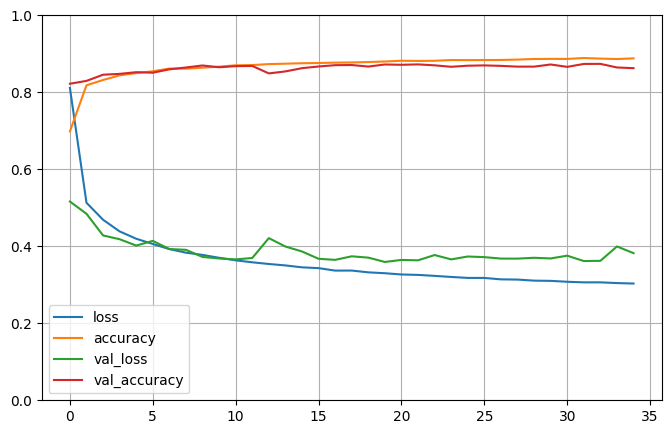

In [237]:
import pandas as pd

pd.DataFrame(history.history).plot(figsize=(8, 5))
plt.grid(True)
plt.gca().set_ylim(0, 1)
# save_fig("keras_learning_curves_plot")
plt.show()

In [238]:
model.evaluate(X_test, y_test)

313/313 [==============================] - 1s 3ms/step - loss: 0.3982 - accuracy: 0.8568


[0.398248553276062, 0.8568000197410583]

In [239]:
X_new = X_test[:3]
y_proba = model.predict(X_new)
y_proba.round(2)

1/1 [==============================] - 0s 189ms/step


array([[0.  , 0.  , 0.  , 0.  , 0.  , 0.02, 0.  , 0.08, 0.  , 0.89],
       [0.  , 0.  , 0.95, 0.  , 0.03, 0.  , 0.02, 0.  , 0.  , 0.  ],
       [0.  , 1.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.  ]],
      dtype=float32)

**Warning**: `model.predict_classes(X_new)` is deprecated. It is replaced with `np.argmax(model.predict(X_new), axis=-1)`.

In [240]:
#y_pred = model.predict_classes(X_new) # deprecated
y_pred = np.argmax(model.predict(X_new), axis=-1)
y_pred

1/1 [==============================] - 0s 34ms/step


array([9, 2, 1])

In [241]:
np.array(class_names)[y_pred]

array(['Ankle boot', 'Pullover', 'Trouser'], dtype='<U11')

In [242]:
y_new = y_test[:3]
y_new

array([9, 2, 1], dtype=uint8)

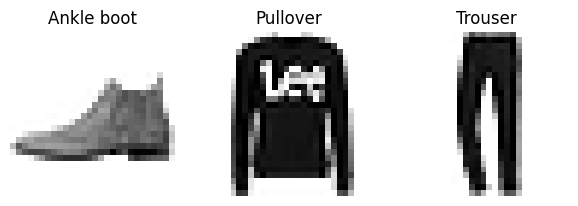

In [244]:
plt.figure(figsize=(7.2, 2.4))
for index, image in enumerate(X_new):
    plt.subplot(1, 3, index + 1)
    plt.imshow(image, cmap="binary", interpolation="nearest")
    plt.axis('off')
    plt.title(class_names[y_test[index]], fontsize=12)
plt.subplots_adjust(wspace=0.2, hspace=0.5)
# save_fig('fashion_mnist_images_plot', tight_layout=False)
plt.show()